# Simulating blockchain for pharamceutical supply chain 

In [137]:
#--------------------------------------------------------------------------------------------------
# Name:		blockchain
# Purpose: Project Simulation Code
# 
# Author: 	Saurabh Kumar
# 
# Created:	12/1/2017
# License: 	<your license>
#--------------------------------------------------------------------------------------------------

#import required libraries
import hashlib as hasher
import datetime as date
import numpy as np
import time
import pandas as pd
import random
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

### Define a blockchain class

In [138]:
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.hash_block()

    def hash_block(self):
        sha = hasher.sha256()
        sha.update(str(self.index).encode('utf-8') + str(self.timestamp).encode('utf-8') + str(self.data).encode('utf-8') + str(self.previous_hash).encode('utf-8'))
        return sha.hexdigest()

### Function to define genesis block

In [139]:
def create_genesis_block():
    data = ['rawmaterial_supplier','manufacturer_id','manufacturer_t1','manufacturer_t2','smanufacturer_id','smanufacturer_t1','smanufacturer_t2','warehouse_id','warehouse_t1','warehouse_t2','distributer_id','distributer_t1','distributer_t2','pharmacy_id','pharmacy_t1','pharmacy_t2','prescriber_id','patient_id','zipcode','pharmacy_returntime','distributer_returntime', 'warehouse_returntime']
    return Block(0, date.datetime.now(), data, "0")


### Funtion to add a new block

In [140]:
def next_block(last_block,data):
    
    this_index = last_block.index + 1
    this_timestamp = date.datetime.now()
    #this_data = "Hey! I'm block " + str(this_index)
    #d = pd.DataFrame([[1,2,3],[2,4,5]])
    #d.columns = ['a','b','c']
    this_data = data
    this_hash = last_block.hash
    
    return Block(this_index, this_timestamp, this_data, this_hash)

In [141]:
# Create the blockchain and add the genesis block
blockchain = [create_genesis_block()]
previous_block = blockchain[0]

time1 = date.datetime.now()

# Number of blocks to add
num_of_blocks_to_add = 2000

# Data Points
hashes = []

### Function to create data 

In [142]:
data = ['rawmaterial_supplier','manufacturer_id','manufacturer_t1','manufacturer_t2','smanufacturer_id','smanufacturer_t1','smanufacturer_t2','warehouse_id','warehouse_t1','warehouse_t2','distributer_id','distributer_t1','distributer_t2','pharmacy_id','pharmacy_t1','pharmacy_t2','prescriber_id','patient_id','zipcode','pharmacy_returntime','distributer_returntime', 'warehouse_returntime']
supply_chain_data = pd.DataFrame(columns= data)

def create_data(supply_chain_data):
    s = np.random.normal(2, .25, 2000)
    r_id = np.random.normal(10, 1.25, 2000)
    d_id = np.random.normal(10, 1.25, 2000)
    rp_id = np.random.normal(10, 2, 2000)
    pres_id = np.random.normal(100, 10, 2000)

    timestamp = date.datetime.now() - timedelta(days=5000)


    for i in range(num_of_blocks_to_add):


        # Condition for Raw Material Supplier
        if r_id[i] < 9:
            rawmaterial_supplier = 'raw1'
        elif r_id[i] > 11:
            rawmaterial_supplier = 'raw3'
        else:
            rawmaterial_supplier = 'raw2'

        # Condition for Primary Manufacturer
        if (rawmaterial_supplier == 'raw1' or rawmaterial_supplier == 'raw2'):
            manufacturer_id = 'm1'
        else:
            manufacturer_id = 'm2'

        # Secondary Manufacturer and Warehouse
        smanufacturer_id = 'sm1'
        warehouse_id = 'w1'

        # Condition for Distributor
        if d_id[i] < 11:
            distributer_id = 'd1'
        else:
            distributer_id = 'd2'

        # Condition for Pharmacy
        if distributer_id == 'd2':
            pharmacy_id = 'hp1'
            zipcode = 'zip1'
        else:
            if rp_id[i] < 9.8:
                pharmacy_id = 'rp1'
                zipcode = 'zip2'
            else:
                pharmacy_id = 'rp2'
                zipcode = 'zip3'


        # Condition for Presciber
        if pres_id[i] < 100:
            prescriber_id = 'pres1'
        elif pres_id[i] >104:
            prescriber_id = 'pres2'
        else:
            prescriber_id = 'pres3'

        # Condition for Patient
        patient_id = random.randint(1,99)


        # Timestamp     
        timestamp = timestamp + timedelta(days=s[i])

        t2 = np.random.normal(30, 4, 20)
        t1 = np.random.normal(10, 2, 20)
        t2_1000 = np.random.normal(12, 2, 20)

        # Calculating stock and release time for manufacturer
        manufacturer_t1 = timestamp + timedelta(days=t1[1])
        manufacturer_t2 = manufacturer_t1 + timedelta(days=t2[1])

        # Calculating stock and release time for secondary manufacturer
        smanufacturer_t1 = manufacturer_t2 + timedelta(days=t1[6])
        smanufacturer_t2 = smanufacturer_t1 + timedelta(days=t2[6])

        # Calculating stock and release time for warehouse
        warehouse_t1 = smanufacturer_t2 + timedelta(days=t1[11])
        warehouse_t2 = warehouse_t1 + timedelta(days=t2[1])


        if i < 1000:

            distributer_t1 = warehouse_t2 + timedelta(days=t1[14])
            distributer_t2 = distributer_t1 + timedelta(days=(2 * t1[14]))

            pharmacy_t1 = distributer_t2 + timedelta(days=t1[8])
            pharmacy_t2 = pharmacy_t1 + timedelta(days=t2[9])

        else:
            distributer_t1 = warehouse_t2 + timedelta(days=t1[16])
            distributer_t2 = distributer_t1 + timedelta(days=t1[16])

            pharmacy_t1 = distributer_t2 + timedelta(days=t1[9])
            pharmacy_t2 = pharmacy_t1 + timedelta(days=(t2[7]/2))

        if i%133 == 0:
            patient_id = 0
            prescriber_id = ''
            zipcode = ''
            pharmacy_t2 = None
            retailer_returntime = pharmacy_t1 + timedelta(days=100)
            distributer_returntime = retailer_returntime + timedelta(days=t2[17])
            warehouse_returntime = distributer_returntime + timedelta(days=t2[19])
        else:
            retailer_returntime = None
            distributer_returntime = None
            warehouse_returntime = None

        supply_chain_data.loc[i] = [rawmaterial_supplier,manufacturer_id,manufacturer_t1,manufacturer_t2,smanufacturer_id,smanufacturer_t1,smanufacturer_t2,warehouse_id,warehouse_t1,warehouse_t2,distributer_id,distributer_t1,distributer_t2,pharmacy_id,pharmacy_t1,pharmacy_t2,prescriber_id,patient_id,zipcode,retailer_returntime,distributer_returntime,warehouse_returntime]
    
    print ("Supply Chain Data Created")
    return supply_chain_data

In [143]:
supply_chain_data = create_data(supply_chain_data)
supply_chain_data.to_csv("supply_chain_data.csv",index=False)

Supply Chain Data Created


### Function to add blocks to the blockchain

In [144]:
def add_block(supply_chain_data,previous_block,hashes,num_of_blocks_to_add):
    
    s = np.random.normal(0.125, .25, num_of_blocks_to_add)
    
    # Add blocks to the chain
    for i in range(0, num_of_blocks_to_add):
        block_to_add = next_block(previous_block,supply_chain_data.loc[i])
        blockchain.append(block_to_add)
        previous_block = block_to_add

        hashes.append(block_to_add.hash)

        if (s[i]<0):
            s[i] = 0.00028 * i
        time.sleep(s[i])
    print ("Blocks Added")
    
add_block(supply_chain_data,previous_block,hashes,num_of_blocks_to_add)

Blocks Added


In [145]:
print ("BlockChain class\n", blockchain[0:4])
print ("BlockChain data for 1012th block\n")
print (blockchain[1012].data)

('BlockChain class\n', [<__main__.Block instance at 0x7fb24c088e60>, <__main__.Block instance at 0x7fb24c8fd830>, <__main__.Block instance at 0x7fb24c493e18>, <__main__.Block instance at 0x7fb255c765a8>])
BlockChain data for 1012th block

rawmaterial_supplier                            raw2
manufacturer_id                                   m1
manufacturer_t1           2009-11-01 10:08:31.834318
manufacturer_t2           2009-12-01 16:44:51.044222
smanufacturer_id                                 sm1
smanufacturer_t1          2009-12-10 20:36:37.197505
smanufacturer_t2          2010-01-09 13:55:05.928505
warehouse_id                                      w1
warehouse_t1              2010-01-24 04:32:41.044488
warehouse_t2              2010-02-23 11:09:00.254392
distributer_id                                    d1
distributer_t1            2010-03-06 01:05:32.573576
distributer_t2            2010-03-16 15:02:04.892760
pharmacy_id                                      rp1
pharmacy_t1        

### Creating hash table for security

In [146]:
creation_time = [i.timestamp for i in blockchain]
block_index = [i.index for i in blockchain]
previous_hash = [i.previous_hash for i in blockchain]

df1 = pd.DataFrame([block_index,previous_hash,creation_time])
df1 = df1.transpose()

df1.columns = ["block_index","previous_hash","creation_time"]
df1.to_csv("hash_table.csv",index=False)
print ("Hash Table created")

Hash Table created


### Function to Update a block

In [147]:
def block_update(block_id, key, timestamp):
    
    print ("Hash Key for 1500 block: ",blockchain[block_id].previous_hash)
    
    if (blockchain[block_id].previous_hash == key):
        blockchain[block_id].timestamp = timestamp
        print ("Block #{} has been updated".format(block_id))
        
    else:
        print ("The key did not match")


In [148]:
# Reading the hash table before updating
hash_table = pd.read_csv("hash_table.csv")

#Update the timestamp for 1500th block
#Calling the block update function
block_id = 1500
key = hash_table.previous_hash[1500]
timestamp = date.datetime.now() - timedelta(days=2)

print ("Key from hash table: ", key)
block_update(block_id, key, timestamp)

('Key from hash table: ', '6754a2e910ceabe174972d553bff5bbe9a7ec7743c962bef95bae46a5345d324')
('Hash Key for 1500 block: ', '6754a2e910ceabe174972d553bff5bbe9a7ec7743c962bef95bae46a5345d324')
Block #1500 has been updated


## Analysis

#### 1. Finding Number of Opioid Batches sold Each Year

In [149]:
sales_yearly = []
count = 0
for i in supply_chain_data.pharmacy_t2:
    if i:
        #print i.date
        sales_yearly.append(str(i.year))
        count=count+1
    else:
        sales_yearly.append('')
        count=count+1
        


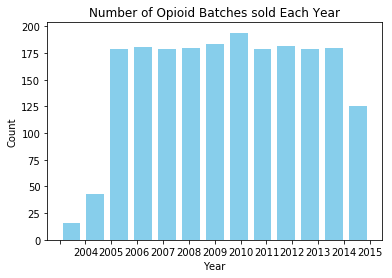

In [150]:
plt.hist(sales_yearly,bins = 13, rwidth = 0.75,color = "skyblue")
plt.title('Number of Opioid Batches sold Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('./images/yearly_batch_count_hist.png')
plt.show()
#sales_yearly.count('2014')


#### 2. Finding Number of Prescriptions by each Doctor/Physician

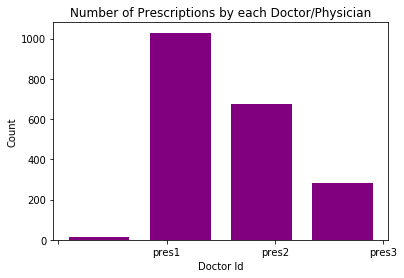

In [151]:
plt.hist(supply_chain_data.prescriber_id,bins = 4, rwidth = 0.75,color = "purple")
plt.title('Number of Prescriptions by each Doctor/Physician')
plt.xlabel('Doctor Id')
plt.ylabel('Count')
plt.savefig('./images/prescriptions_hist.png')
plt.show()

#### 3. Number of Buyers by Each Zipcode

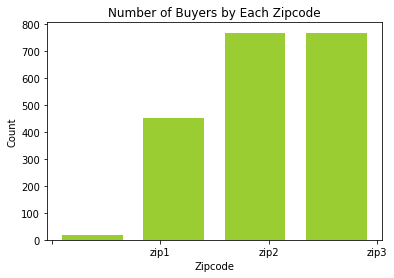

In [152]:
plt.hist(supply_chain_data.zipcode,bins = 4, rwidth = 0.75,color = "yellowgreen")
plt.title('Number of Buyers by Each Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.savefig('./images/zipcode_hist.png')
plt.show()

#### 4. Average Number of Days Opioid Stocked

In [153]:
def avg(a):
    return (sum(a)/len(a))

manufacturer_days = []
smanufacturer_days = []
pharmacy_days = []
warehouse_days = []
distributer_days = []

for i in range(2000):
    
    distributer_days.append((supply_chain_data.distributer_t2[1] - supply_chain_data.distributer_t1[1]).days)
    manufacturer_days.append((supply_chain_data.manufacturer_t2[1] - supply_chain_data.manufacturer_t1[1]).days)
    smanufacturer_days.append((supply_chain_data.smanufacturer_t2[1] - supply_chain_data.smanufacturer_t1[1]).days)
    pharmacy_days.append((supply_chain_data.pharmacy_t2[1] - supply_chain_data.pharmacy_t1[1]).days)
    warehouse_days.append((supply_chain_data.warehouse_t2[1] - supply_chain_data.warehouse_t1[1]).days)


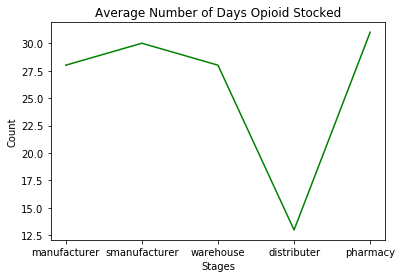

In [154]:
avg_list = [avg(manufacturer_days), avg(smanufacturer_days),avg(warehouse_days),avg(distributer_days),avg(pharmacy_days)]
plt.title('Average Number of Days Opioid Stocked')
plt.xlabel('Stages')
plt.xticks(range(5),['manufacturer', 'smanufacturer', 'warehouse', 'distributer', 'pharmacy'])
plt.ylabel('Count')
plt.plot(avg_list,color = "green")
plt.savefig('./images/average_hist.png')
plt.show()

In [155]:
time2 = date.datetime.now()
min = (time2-time1).total_seconds()/60.0

In [156]:
print ("Runtime in minutes: ", min)

('Runtime in minutes: ', 9.166761166666667)
